# Module 2 Final Project

*  jenyl murdock
*  PT 1-14-19
*  Instructor:  Joe San Pietro

## The Scientific Method will be used to analyze the information from the Northwind data file.

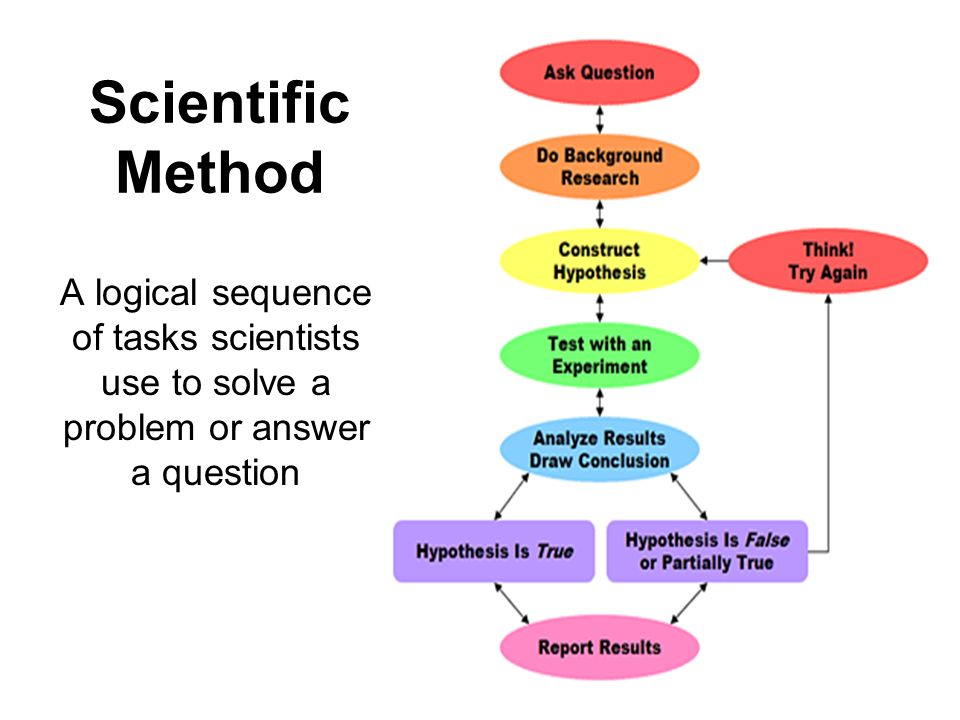

## Import the libraries that will be needed

In [1]:
# import necessary libraries

import sqlite3 # for database
import pandas as pd # for dataframe
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import numpy as np # analysis
from scipy import stats # significance levels, normality
from statsmodels.stats.multicomp import MultiComparison   # for the Tukey test
import itertools # for combinations
import statsmodels.api as sm # anova
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore') # hide matplotlib warnings

Reference for selection of graph colors:
https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

## Connect to the database

In [2]:
connection = sqlite3.connect('Northwind_small.sqlite')
cur = connection.cursor()

In [3]:
# Let's take a look at the table names
tables = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';").fetchall()
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

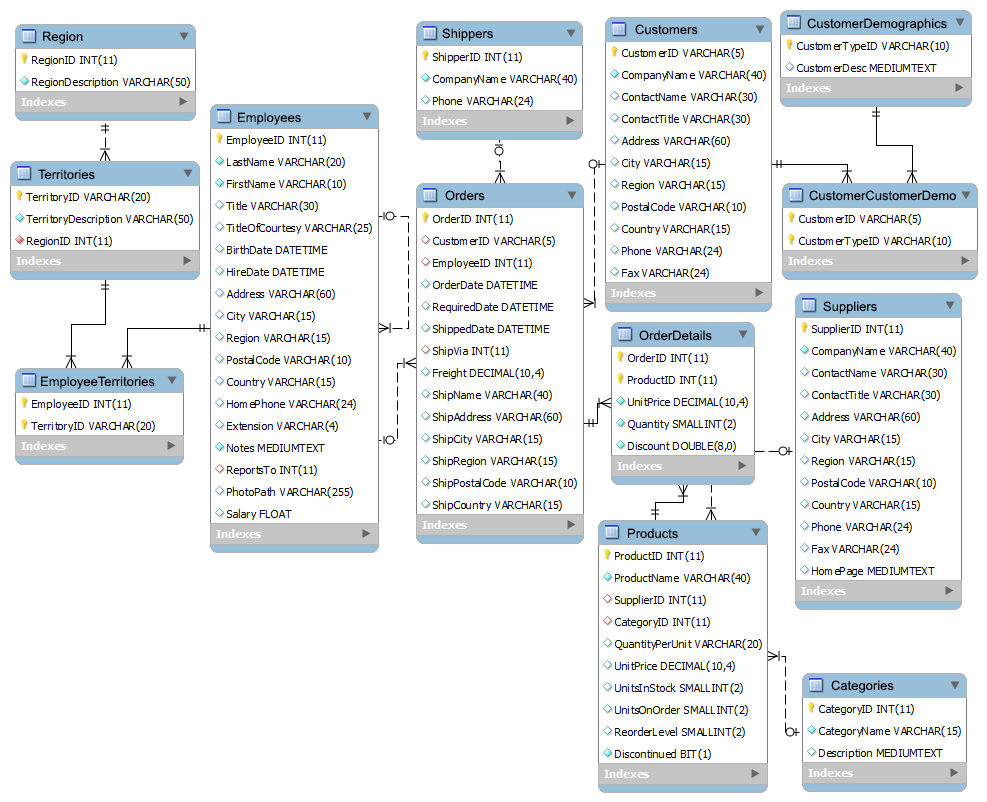

## Check each table to verify that it contains relevant information before converting it to a dataframe

In [4]:
# The table columns are listed above but the code to list columns would be:
#  cur.execute('''pragma table_info('OrderDetail')''').fetchall() 

#  check for contents of each table
print ('Employee entry:')
print (cur.execute('''select * from Employee;''').fetchone())
print ('\nCategory entry:')
print (cur.execute('''select * from Category''').fetchall())
print ('\nCustomer entry:')
print (cur.execute('''select * from Customer''').fetchone())
print ('\nShipper entry:')
print(cur.execute('''select * from Shipper''').fetchall())   # 3 shippers
print ('\nSupplier entry:')
print (cur.execute('''select * from Supplier''').fetchone())
print ('\nProduct entry:')
print (cur.execute('''select * from Product''').fetchone())    
print ('\nRegion entry:')
print (cur.execute('''select * from Region''').fetchall()) 
print ('\nTerritory entry:')
print (cur.execute('''select * from Territory''').fetchone())    
print ('\nEmployee Territory entry:')
print (cur.execute('''select * from EmployeeTerritory limit 5''').fetchall())    
print ('\nCustomer Customer Demo entry:')
print (cur.execute('''select * from CustomerCustomerDemo''').fetchall())
print ('\nCustomer Demographic entry:')
print (cur.execute('''select * from CustomerDemographic''').fetchall())


Employee entry:
(1, 'Davolio', 'Nancy', 'Sales Representative', 'Ms.', '1980-12-08', '2024-05-01', '507 - 20th Ave. E. Apt. 2A', 'Seattle', 'North America', '98122', 'USA', '(206) 555-9857', '5467', None, "Education includes a BA in psychology from Colorado State University in 1970.  She also completed 'The Art of the Cold Call.'  Nancy is a member of Toastmasters International.", 2, 'http://accweb/emmployees/davolio.bmp')

Category entry:
[(1, 'Beverages', 'Soft drinks, coffees, teas, beers, and ales'), (2, 'Condiments', 'Sweet and savory sauces, relishes, spreads, and seasonings'), (3, 'Confections', 'Desserts, candies, and sweet breads'), (4, 'Dairy Products', 'Cheeses'), (5, 'Grains/Cereals', 'Breads, crackers, pasta, and cereal'), (6, 'Meat/Poultry', 'Prepared meats'), (7, 'Produce', 'Dried fruit and bean curd'), (8, 'Seafood', 'Seaweed and fish')]

Customer entry:
('ALFKI', 'Alfreds Futterkiste', 'Maria Anders', 'Sales Representative', 'Obere Str. 57', 'Berlin', 'Western Europe',

There are 4 regions comprised of:  Eastern, Western, Northern, & Southern

There are 3 shippers used. 

There is nothing in the CustomerCustomerDemo or CustomerDemographic tables 

In [5]:
# convert tables to data frames
# the Order table produces an error using sql_query because it is also the name of a command in sql

employees = pd.read_sql_query('SELECT * FROM Employee;', connection)
categories = pd.read_sql_query('SELECT * FROM Category;', connection)
customers = pd.read_sql_query('SELECT * FROM Customer;', connection)
shippers = pd.read_sql_query('SELECT * FROM Shipper;', connection)

suppliers = pd.read_sql_query('SELECT * FROM Supplier;', connection)
orders = pd.read_sql_query('SELECT * FROM [Order];', connection)
products = pd.read_sql_query('SELECT * FROM Product;', connection)
order_details = pd.read_sql_query('SELECT * FROM OrderDetail;', connection)

regions = pd.read_sql_query('SELECT * FROM Region;', connection)
territories = pd.read_sql_query('SELECT * FROM Territory;', connection)
empl_territory = pd.read_sql_query('SELECT * FROM EmployeeTerritory;', connection)

employees.head(2)
orders.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [6]:
#  Drop unnecessary columns in employees
employees = employees.iloc[:,:12]
employees.head(2)

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA


## Question 1:
### Do discounts have a statistically significant effect on the number of products customers order?
### If so, at what level(s) of discount?

Ho - Discounts have no effect on the number of products that customers order

Ha - Discounts have an affect on the number of products that customer order

In [7]:

order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [8]:
#check for null values
order_details.isna().sum()

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

In [9]:
order_details.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [10]:
# classify the orders by discount or no discount
disc_orders = (order_details['Discount'] != 0).sum()
print ('Number of discounted orders', disc_orders)
no_disc = (order_details['Discount'] == 0).sum()
print ('Number of non-discounted orders', no_disc)

Number of discounted orders 838
Number of non-discounted orders 1317


In [11]:
# make a new column with boolean values to indicate a discount or not
order_details['has_disc'] = order_details['Discount'].apply(lambda row: 1 if row > 0 else 0)


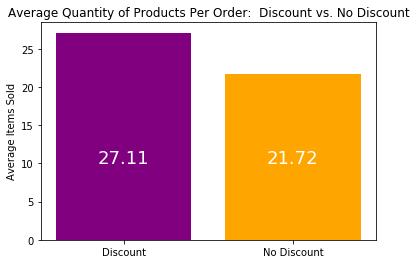

In [12]:
#  the following code is from https://github.com/matthewsparr/Northwind-Database-Hypothesis-Testing/blob/master/project.ipynb
#  create a column that has 2 categories: has a discount or no discount

order_details['has_disc'] = order_details['Discount'].apply(lambda row: 1 if row > 0 else 0)

X = ['Discount', 'No Discount']
y = [order_details['Quantity'][order_details['has_disc'] == 1].mean(),
     order_details['Quantity'][order_details['has_disc'] == 0].mean()]
plt.bar(X,y, color=('purple','orange'))
plt.text(s=round(y[1],2), x=1, y=10, color="w", horizontalalignment='center',size=18)
plt.text(s=round(y[0],2), x=0, y=10, color="w", horizontalalignment='center',size=18)
plt.ylabel('Average Items Sold')
plt.title('Average Quantity of Products Per Order:  Discount vs. No Discount')
plt.show()



In [13]:
no_disc = order_details[order_details['Discount'] == 0].copy()
disc = order_details[order_details['Discount'] > 0].copy()

p_val = stats.ttest_ind(no_disc.Quantity, disc.Quantity)[1]
print ('The p_value is', p_val)

The p_value is 1.1440924523215966e-10


### Let's take a look at the distribution of the various discounts offered

Text(0.5, 1.0, 'Distribution of Discount Given')

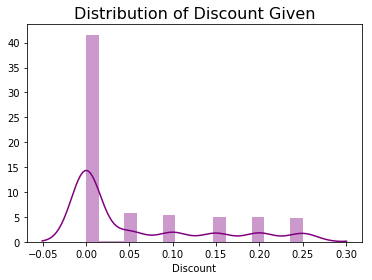

In [14]:
plot = sns.distplot(order_details['Discount'],color = 'purple');
plt.title('Distribution of Discount Given', fontsize=16)


In [15]:
# chaeck the different discounts offered

order_details['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [16]:
# There are some outliers in the data so we will remove those entries

order_details = order_details[order_details['Discount'] != 0.06]
order_details = order_details[order_details['Discount'] != 0.04]
order_details = order_details[order_details['Discount'] != 0.03]
order_details = order_details[order_details['Discount'] != 0.02]
order_details = order_details[order_details['Discount'] != 0.01]


order_details['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

In [17]:
# Check information on the Quantity column
order_details['Quantity'].describe()

count    2147.000000
mean       23.895203
std        19.009580
min         1.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       130.000000
Name: Quantity, dtype: float64

Text(0.5, 0, 'Quantity of products ordered')

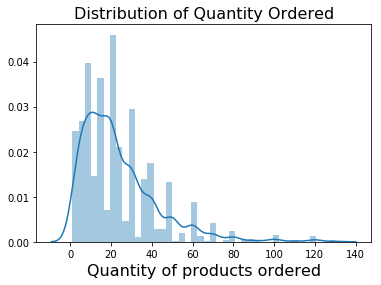

In [18]:
# Get a visual of the values in the Quantity column
#plt.figure(figsize=(15, 10))
sns.distplot(order_details['Quantity'])
plt.title('Distribution of Quantity Ordered', fontsize=16)
plt.xlabel('Quantity of products ordered', fontsize=16)

In [19]:
# create control and experimental groups
# the control group is the customers who did not receive a discount
# the experimental group is the customers who did receive a discount
control = order_details[order_details['Discount'] == 0]
control = np.array(control['Quantity'])
print(control)
experimental = order_details[order_details['Discount'] != 0]
experimental = np.array(experimental['Quantity'])

[12 10  5 ...  1  4  2]


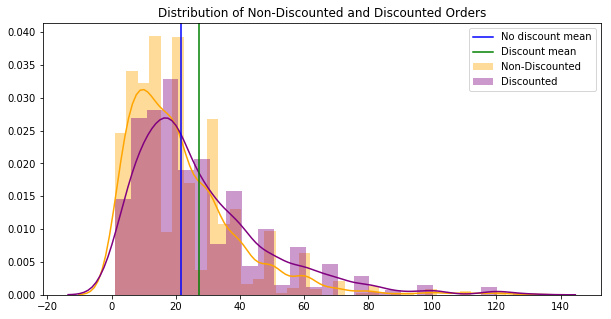

In [20]:
# Draw a plot showing overlapping of distribution means for inspection
plt.figure(figsize=(10, 5))
sns.distplot(control, color='orange', label='Non-Discounted') 
sns.distplot(experimental, color='purple', label='Discounted')
plt.axvline(np.mean(control), color='blue', label='No discount mean')
plt.axvline(np.mean(experimental), color='green', label='Discount mean')
plt.title('Distribution of Non-Discounted and Discounted Orders')
plt.legend()

For a more formal way to check if a dataset is normally distributed or not, we can make use of a statistical test. There are many different statistical tests that can be used to check for normality, but we'll keep it simple and just make use the normaltest function from scipy--see the documentation if you have questions about how to use this method.

In the cell below, use normaltest() to check if the dataset is normally distributed.

In [21]:
test1 = stats.normaltest(control)
print ('Normality Test:  Control Group\n', test1)
test2 =stats.normaltest(experimental)
print ('\nNormality Test:  Experimental Group\n', test2)

Normality Test:  Control Group
 NormaltestResult(statistic=544.5770045551502, pvalue=5.579637380545965e-119)

Normality Test:  Experimental Group
 NormaltestResult(statistic=261.04626710761113, pvalue=2.0631145260149106e-57)


###  If the p-val is very small, it means it is unlikely that the data came from a normal distribution. 0.05 is the standard threshold.  Here we have a very small p-value and therefore we can reject the null hypothesis that the data is normally distributed.

### Sampling With Replacement

In order to create a Sample Distribution of Sample Means, we need to first write a function that can sample with replacement.



In [22]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample

control_sample = get_sample(control, 30)
print ('Control Sample:', control_sample[:5])


exp_sample = get_sample(experimental, 30)
print ('Test Sample:', exp_sample[:5])

Control Sample: [2, 35, 15, 25, 3]
Test Sample: [30, 12, 8, 21, 30]


### Generating a Sample Mean

In [23]:
# Define a function to generate the mean of a sample
def get_sample_mean(sample):
    sample_mean = sum(sample) / len(sample)
    return sample_mean

control_mean = get_sample_mean(control_sample)
print('Non-Discounted Orders Sample Mean:', round(control_mean,3))
exp_mean = get_sample_mean(exp_sample)
print('Discounted Orders Sample Mean:', round(exp_mean,3))

Non-Discounted Orders Sample Mean: 22.3
Discounted Orders Sample Mean: 30.767


### Creating a Sample Distribution of Sample Means

In [24]:
# get a new sample
def create_sample_distribution(data, dist_size=500, n=30):
    sample_means = []
    for i in range(0, dist_size):
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_means.append(sample_mean)
    return sample_means


control_sample_dist = create_sample_distribution(control)
print ('Distribution of Non-Discounted Orders Sample Means:\n', control_sample_dist[:5])
exp_sample_dist = create_sample_distribution(experimental)
print('\nDistribution of Discounted Orders Sample Means:\n', exp_sample_dist[:5])

Distribution of Non-Discounted Orders Sample Means:
 [16.2, 20.7, 25.566666666666666, 20.233333333333334, 23.033333333333335]

Distribution of Discounted Orders Sample Means:
 [23.266666666666666, 31.5, 26.4, 30.8, 31.466666666666665]


### Visualizing the Sample Distribution as it Becomes Normal
The sample distribution of sample means isn't guaranteed to be normal after it hits a magic size. Instead, the distribution begins to approximate a normal distribution as it gets larger and larger. Generally, 30 is accepted as the number for sample size where the Central Limit Theorem begins to kick in--however, there are no magic numbers when it comes to probability. On average, and only on average, a sample distribution of sample means where the individual sample sizes were 29 would only be slightly less normal, while one with sample sizes of 31 would likely only be slightly more normal.



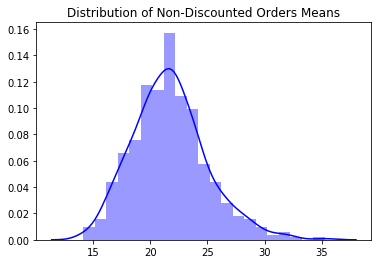

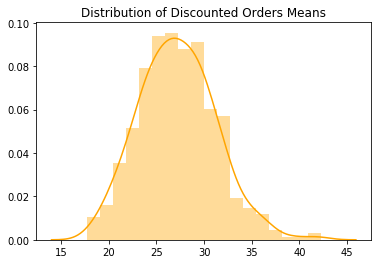

In [25]:

sns.distplot(control_sample_dist,color = 'blue')
plt.title('Distribution of Non-Discounted Orders Means')
plt.show()
sns.distplot(exp_sample_dist,color = 'orange')
plt.title('Distribution of Discounted Orders Means')
plt.show()


In [26]:
# Check to see if the variance is the same between the two samples
print('Variance No discount:', np.var(control))
print('Variance Discount:', np.var(experimental))

#  another way to check this is:
# test whether variances are equal 
# np.var(control) == np.var(experimental)

Variance No discount: 306.2795924332757
Variance Discount: 428.8287472782697


The variances of the control group and experimental group are not equal.  As a result, we will need to use the 
Welch's t-test with the following formula:

#### scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')[source]¶

Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.



## Welch's t test

In [27]:
#  the stats.ttest function returns a t statistic and a p value
t_stat, p_value = stats.ttest_ind(exp_sample, control_sample, equal_var=False)
print ('t-statistic = ', t_stat)
print ('p value = ', p_value)
print('Reject Null Hypothesis') if p_value < 0.05 else print('Failed to reject Null Hypothesis')


t-statistic =  1.4666804288291408
p value =  0.14850264488005965
Failed to reject Null Hypothesis


## Cohen's  d

Cohen’s D is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

The basic formula to calculate Cohen’s  d  is:

d  = effect size (difference of means) / pooled standard deviation

The denominator is the standardizer, and it is important to select the most appropriate one for a given dataset. The pooled standard deviation is the average spread of all data points around their group mean (not the overall mean).

In [28]:
# Basically, cohen's d gives the difference between the two sample means
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

cohensd = Cohen_d(np.array(exp_sample), np.array(control_sample))
print ("Cohen's d:", cohensd)

Cohen's d: 0.3851691505094454


## Interpreting $d$
Most people don't have a good sense of how big $d=2.0$ is. If you are having trouble visualizing what the result of Cohen’s D means, use these general “rule of thumb” guidelines (which Cohen said should be used cautiously):

>**Small effect = 0.2**

>**Medium Effect = 0.5**

>**Large Effect = 0.8**

Here is an excellent online visualization tool developed by [Kristoffer Magnusson](https://rpsychologist.com/d3/cohend/) to help interpret the results of cohen's $d$ statistic. 


the discount has a medium effect on the number of products ordered

## ANOVA

### Generating the ANOVA Table

In order to generate the ANOVA table, we will fit a model and then generate the table from this object. The syntax for defining the model is a little different then what we've seen previously. Our formula will be written as:

Control_Column ~ C(factor_col1) + factor_col2 + C(factor_col3) + ... + X

*We indicate categorical variables by wrapping them with C()

In [29]:
formula = 'Quantity ~ C(Discount)'
lm = ols(formula, order_details).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq      df         F        PR(>F)
C(Discount)   17348.854662     5.0  9.798709  2.840681e-09
Residual     758138.565924  2141.0       NaN           NaN


## Reading the Table

For now we will simply focus on the outermost columns. On the left, you can see our various groups, and on the right, the probability that the factor is indeed influential. Values < .05 (or whatever we set $\alpha$ to) indicate rejection of the null hypothesis.

### link from Joe for the Tukey Test
https://github.com/chineseballer06/dsc-2-final-project-online-ds-ft-011419/blob/master/student.ipynb

## Tukey Test

In [30]:
#   Group the orders by discount
order_details['Quantity'].groupby(order_details['Discount']).describe()


,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0.00,1317.0,21.715262,17.507493,1.0,10.0,18.0,30.0,130.0
0.05,185.0,28.010811,22.187685,1.0,14.0,20.0,40.0,120.0
0.10,173.0,25.236994,21.186503,2.0,10.0,20.0,30.0,130.0
0.15,157.0,28.382166,20.923099,2.0,15.0,21.0,40.0,100.0
0.20,161.0,27.024845,18.832801,2.0,12.0,21.0,40.0,100.0
0.25,154.0,28.240260,20.120570,2.0,15.0,25.0,36.0,120.0


In [31]:
# run the tukey test
mc = MultiComparison(order_details['Quantity'], order_details['Discount'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   6.2955   2.0814 10.5097  True 
 0.0    0.1    3.5217  -0.8187  7.8622 False 
 0.0    0.15   6.6669   2.1352 11.1986  True 
 0.0    0.2    5.3096   0.8285  9.7907  True 
 0.0    0.25   6.525    1.954   11.096  True 
 0.05   0.1   -2.7738  -8.4504  2.9028 False 
 0.05   0.15   0.3714  -5.4528  6.1955 False 
 0.05   0.2    -0.986  -6.7708  4.7989 False 
 0.05   0.25   0.2294  -5.6253  6.0842 False 
 0.1    0.15   3.1452   -2.771  9.0613 False 
 0.1    0.2    1.7879  -4.0896  7.6653 False 
 0.1    0.25   3.0033   -2.943  8.9496 False 
 0.15   0.2   -1.3573  -7.3775  4.6628 False 
 0.15   0.25  -0.1419  -6.2292  5.9454 False 
 0.2    0.25   1.2154  -4.8343  7.2652 False 
---------------------------------------------
[0.   0.05 0.1  0.15 0.2  0.25]


### Results:

Here the Tukey test shows that at the discount levels of 5%, 15%, 20%, and 25% there is a significant difference in the quantity of products ordered compared to when there is no discount. With 95% confidence, this significance is not due to random chance. This information is valuable for Northwind because they do not need to offer discounts at other levels because it has no statistically significant effect on the amount of products that customers will buy.
There is no point in offering products at a discount if it does not affect the quantity of products purchased. 


## Question 2:

### How do the  shipping rates compare between the different shipping companies?

#### Ho - Shipping rates are the same for each company

#### Ha - Shipping rates vary significanatly between the companies

In [32]:
orders.head(2)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany


In [33]:
shipping = orders.iloc[ :,6:12]
shipping.head()

,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion
0,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe
1,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe
2,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America
3,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe
4,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe


Text(0.5, 1.0, 'Distribution of Shippers Used')

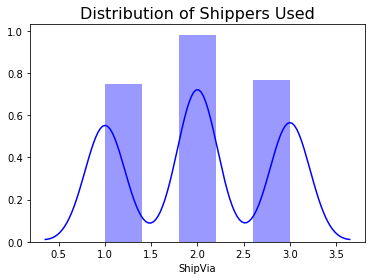

In [34]:
plot = sns.distplot(shipping['ShipVia'],color = 'blue');
plt.title('Distribution of Shippers Used', fontsize=16)


####  Shipper 1:  Speedy Express
#### Shipper 2:  United package
#### Shipper 3:  Federal Shipping

In [35]:
shipping.groupby('ShipVia').describe()


Freight                                                            
          count       mean         std   min    25%     50%    75%      max
ShipVia                                                                    
1         249.0  65.001325   75.393587  0.12  12.75  40.420  89.90   458.78
2         326.0  86.640644  138.219262  0.02  14.04  44.135  91.43   890.78
3         255.0  80.441216  119.362844  0.40  12.86  36.710  99.49  1007.64

In [36]:
# Get separate data frames for each shipper
speed_exp = shipping.loc[shipping['ShipVia'] == 1]
united_pack = shipping.loc[shipping['ShipVia'] == 2]
fed_ship = shipping.loc[shipping['ShipVia'] == 3]
fed_ship.head()

,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion
0,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe
7,3,148.33,Richter Supermarkt,Starenweg 5,Genève,Western Europe
9,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,South America
11,3,3.25,Centro comercial Moctezuma,Sierras de Granada 9993,México D.F.,Central America
14,3,48.29,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,North America


In [37]:
# create populations of the three shippers
speedexp = speed_exp['Freight']
unitedpac = united_pack['Freight']
fedship = fed_ship['Freight']
speedexp.head()

1      11.61
3      41.34
10    140.51
12     55.09
17     55.28
Name: Freight, dtype: float64

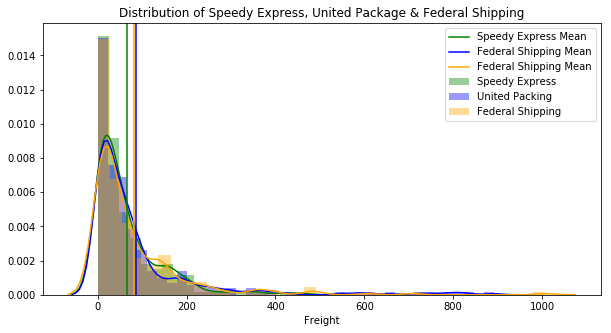

In [38]:
# Draw a plot showing overlapping of distribution means and sds for inspection
plt.figure(figsize=(10, 5))
sns.distplot(speedexp, color='green', label='Speedy Express')
sns.distplot(unitedpac, color = 'blue', label='United Packing')
sns.distplot(fedship, color='orange', label='Federal Shipping') 

plt.axvline(np.mean(speedexp), color='green', label='Speedy Express Mean')
plt.axvline(np.mean(unitedpac), color='blue', label='Federal Shipping Mean')
plt.axvline(np.mean(fedship), color='orange', label='Federal Shipping Mean')

plt.title('Distribution of Speedy Express, United Package & Federal Shipping')
plt.legend()

In [39]:
#  check to see if the data is normally distributed
test1 = stats.normaltest(speedexp)
print ('Normality Test:  Speedy Express\n', test1)
test2 =stats.normaltest(unitedpac)
print ('\nNormality Test: United Package\n', test2)
test3 =stats.normaltest(fedship)
print ('\nNormality Test: Federal Shipping\n', test3)

Normality Test:  Speedy Express
 NormaltestResult(statistic=127.37712318599775, pvalue=2.1898236398446387e-28)

Normality Test: United Package
 NormaltestResult(statistic=262.21849720901463, pvalue=1.1480923009081493e-57)

Normality Test: Federal Shipping
 NormaltestResult(statistic=228.7533946071003, pvalue=2.1224208469747222e-50)


### The p-values are < .05 so therefore our data is not normally distributed

In [40]:
#  sampling with replacement

speed_sample = get_sample(speedexp, 30)
print ('Speedy Express Sample:', speed_sample[:5])

united_sample = get_sample(unitedpac, 30)
print ('United Packing Sample:', united_sample[:5])

fed_sample = get_sample(fedship, 30)
print ('Federal Shipping Sample:', fed_sample[:5])


Speedy Express Sample: [78.85, 47.84, 32.76, 8.05, 12.69]
United Packing Sample: [38.82, 112.27, 7.93, 73.91, 152.3]
Federal Shipping Sample: [2.38, 19.77, 477.9, 96.43, 367.63]


In [41]:
# . generate sample means
speed_mean = get_sample_mean(speed_sample)
print('Speedy Express Sample Mean:', round(speed_mean,3))
united_mean = get_sample_mean(united_sample)
print('United Packing Sample Mean:', round(united_mean,3))
fed_mean = get_sample_mean(fed_sample)
print('Federal Shipping Sample Mean:', round(fed_mean,3))


Speedy Express Sample Mean: 56.989
United Packing Sample Mean: 119.168
Federal Shipping Sample Mean: 108.954


In [42]:
# . sample distribution of sample means
speed_sample_dist = create_sample_distribution(speed_sample)
print('\nDistribution of Speedy Express Sample Means:\n', speed_sample_dist[:5])
united_sample_dist = create_sample_distribution(united_sample)
print ('\nDistribution of United Packing Sample Means:\n', united_sample_dist[:5])
federal_sample_dist = create_sample_distribution(fed_sample)
print ('\nDistribution of Federal Shipping Sample Means:\n', federal_sample_dist[:5])



Distribution of Speedy Express Sample Means:
 [57.18966666666666, 57.30133333333333, 44.88233333333332, 56.60033333333332, 57.73299999999999]

Distribution of United Packing Sample Means:
 [114.75966666666663, 115.33033333333334, 82.08933333333333, 96.19433333333336, 138.325]

Distribution of Federal Shipping Sample Means:
 [69.664, 116.90133333333334, 77.67166666666668, 114.772, 89.38066666666667]


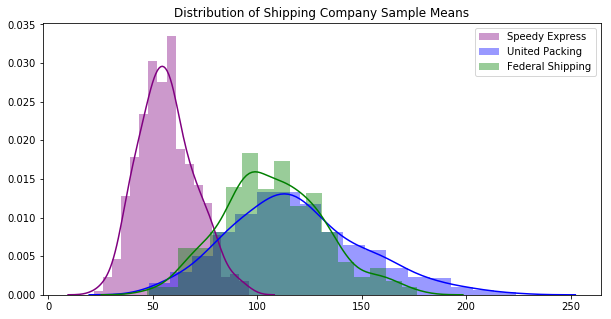

In [43]:
plt.figure(figsize=(10, 5))

sns.distplot(speed_sample_dist,color = 'purple', label='Speedy Express')
sns.distplot(united_sample_dist,color = 'blue', label='United Packing')
sns.distplot(federal_sample_dist,color = 'green', label='Federal Shipping')
plt.title('Distribution of Shipping Company Sample Means')
plt.legend()
plt.show()



In [44]:
# Check to see if the variance is the same between the three samples
print('Variance Speedy Express:', np.var(speedexp))
print('Variance United Package:', np.var(unitedpac))
print('Variance Federal Shipping:', np.var(fedship))


Variance Speedy Express: 5661.364902259641
Variance United Package: 19045.961546517556
Variance Federal Shipping: 14191.616112639753


In [45]:
#  the stats.ttest function returns a t statistic and a p value
t_stat, p_value = stats.ttest_ind(speed_sample, united_sample, equal_var=False)
print('Stats for Speedy Express & United Packing:\n')
print ('t-statistic = ', t_stat)
print ('p value = ', p_value)
print('Reject Null Hypothesis\n') if p_value < 0.05 else print('Failed to reject Null Hypothesis\n')

t_stat, p_value = stats.ttest_ind(speed_sample, fed_sample, equal_var=False)
print('\nStats for Speedy Express & Federal Shipping:\n')
print ('t-statistic = ', t_stat)
print ('p value = ', p_value)
print('Reject Null Hypothesis\n') if p_value < 0.05 else print('Failed to reject Null Hypothesis\n')

t_stat, p_value = stats.ttest_ind(united_sample, fed_sample, equal_var=False)
print('\nStats for United Packing & Federal Shipping:\n')
print ('t-statistic = ', t_stat)
print ('p value = ', p_value)
print('Reject Null Hypothesis\n') if p_value < 0.05 else print('Failed to reject Null Hypothesis\n')


Stats for Speedy Express & United Packing:

t-statistic =  -1.8275173365600776
p value =  0.07509699020398819
Failed to reject Null Hypothesis


Stats for Speedy Express & Federal Shipping:

t-statistic =  -1.8229973891346778
p value =  0.0749248946594126
Failed to reject Null Hypothesis


Stats for United Packing & Federal Shipping:

t-statistic =  0.25610483546533447
p value =  0.7988186140176121
Failed to reject Null Hypothesis



In [46]:
#  perform cohen's d test
cohensd1 = Cohen_d(np.array(speed_sample), np.array(united_sample))
print ("Cohen's d for Speedy Express & United Packing:", abs(cohensd1))
cohensd2 = Cohen_d(np.array(speed_sample), np.array(fed_sample))
print ("Cohen's d for Speedy Express & Federal Shipping:", abs(cohensd2))
cohensd3 = Cohen_d(np.array(united_sample), np.array(fed_sample))
print ("Cohen's d for United Packing & Federal Shipping:", abs(cohensd3))

Cohen's d for Speedy Express & United Packing: 0.47992956490600963
Cohen's d for Speedy Express & Federal Shipping: 0.4787425685597242
Cohen's d for United Packing & Federal Shipping: 0.06725642476615847


## Anova test

In [47]:
#  perform the Anova test
formula = 'Freight ~ C(ShipVia)'
lm = ols(formula, orders).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq     df        F    PR(>F)
C(ShipVia)  6.788200e+04    2.0  2.49781  0.082885
Residual    1.123753e+07  827.0      NaN       NaN


The Anova test failed to reject the null hypothesis

## Tukey test

In [48]:
#   Group the data according to shipping company
shipping['Freight'].groupby(shipping['ShipVia']).describe()


,count,mean,std,min,25%,50%,75%,max
ShipVia,,,,,,,,
1,249.0,65.001325,75.393587,0.12,12.75,40.420,89.90,458.78
2,326.0,86.640644,138.219262,0.02,14.04,44.135,91.43,890.78
3,255.0,80.441216,119.362844,0.40,12.86,36.710,99.49,1007.64


In [49]:
# run the tukey test
mc = MultiComparison(shipping['Freight'], shipping['ShipVia'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  1      2    21.6393  -1.3965  44.6752 False 
  1      3    15.4399  -8.9452   39.825 False 
  2      3    -6.1994  -29.0811 16.6823 False 
----------------------------------------------
[1 2 3]


## Question 3
###  How do the quantity of products sold to different regions compare?

Ho:  There is no signiicant difference in quantity of products sold between the different regions.

Ha:  There is a significant difference in quantity of products sold per region.

https://www.w3schools.com/sql/default.asp

In [50]:
cur.execute('''select * from 'OrderDetail';''')
od = pd.DataFrame(cur.fetchall())
od.columns = [i[0] for i in cur.description]
od.head()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [51]:
cur.execute('''SELECT * FROM "Order" as orders''')

o_df = pd.DataFrame(cur.fetchall())
o_df.columns = [i[0] for i in cur.description]
o_df.head()


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [52]:
o_df['ShipRegion'].unique()

array(['Western Europe', 'South America', 'Central America',
       'North America', 'Northern Europe', 'Scandinavia',
       'Southern Europe', 'British Isles', 'Eastern Europe'], dtype=object)

In [53]:
cur.execute('''SELECT orders.ShipRegion, COUNT(OrderDetail.Quantity) AS QuantityOrdered FROM "Order" as orders 
            JOIN OrderDetail on orders.Id=OrderDetail.OrderId
            GROUP BY ShipRegion''')

region_sales = pd.DataFrame(cur.fetchall())
region_sales.columns = [i[0] for i in cur.description]
region_sales.head(10)


,ShipRegion,QuantityOrdered
0,British Isles,190
1,Central America,72
2,Eastern Europe,16
3,North America,427
4,Northern Europe,143
5,Scandinavia,70
6,South America,355
7,Southern Europe,137
8,Western Europe,745


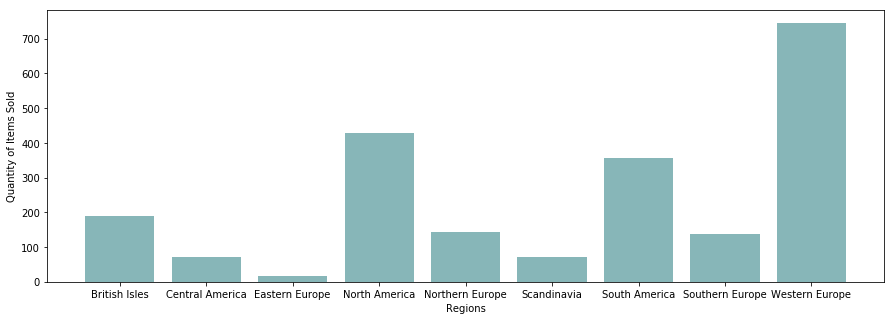

In [54]:
plt.figure(figsize=(15, 5))
X = (region_sales['ShipRegion'])
y = (region_sales['QuantityOrdered'])
plt.bar(X,y, color='cadetblue', alpha = .75)

plt.ylabel('Quantity of Items Sold')
plt.xlabel('Regions')
plt.show()


In [88]:
# get a data frame for statistical analysis

cur.execute('''SELECT orders.ShipRegion, OrderDetail.Quantity FROM "Order" as orders 
            JOIN OrderDetail on orders.Id=OrderDetail.OrderId''')

regions = pd.DataFrame(cur.fetchall())
regions.columns = [i[0] for i in cur.description]
regions.head(10)

reg = regions.loc[:,'ShipRegion']
shipcode = []
for r in reg:
    if r == 'North America':
        shipcode.append(1)
    elif r =='Central America':
        shipcode.append(2)
    elif r =='South America':
        shipcode.append(3)
    elif r =='British Isles':
        shipcode.append(4)
    elif r =='Scandinavia':
        shipcode.append(5)
    elif r =='Northern Europe':
        shipcode.append(6)
    elif r =='Southern Europe':
        shipcode.append(7)
    elif r =='Eastern Europe':
        shipcode.append(8)
    elif r =='Western Europe':
        shipcode.append(9)
regions['Code'] = shipcode
regions.head()

,ShipRegion,Quantity,Code
0,Western Europe,12,9
1,Western Europe,10,9
2,Western Europe,5,9
3,Western Europe,9,9
4,Western Europe,40,9


In [56]:
# Get separate data frames for each region
bi = regions.loc[regions['ShipRegion'] == 'British Isles']
ca = regions.loc[regions['ShipRegion'] == 'Central America']
ee = regions.loc[regions['ShipRegion'] == 'Eastern Europe']
na = regions.loc[regions['ShipRegion'] == 'North America']
ne = regions.loc[regions['ShipRegion'] == 'Northern Europe']
s = regions.loc[regions['ShipRegion'] == 'Scandinavia']
sa = regions.loc[regions['ShipRegion'] == 'South America']
se = regions.loc[regions['ShipRegion'] == 'Southern Europe']
we = regions.loc[regions['ShipRegion'] == 'Western Europe']

we.head()

,ShipRegion,Quantity
0,Western Europe,12
1,Western Europe,10
2,Western Europe,5
3,Western Europe,9
4,Western Europe,40


In [57]:
# create populations of the different regions

bisles = bi['Quantity']
camer = ca['Quantity']
eeuro = ee['Quantity']
namer = na['Quantity']
neuro = ne['Quantity']
scan = s['Quantity']
samer = sa['Quantity']
seuro = se['Quantity']
weuro = we['Quantity']

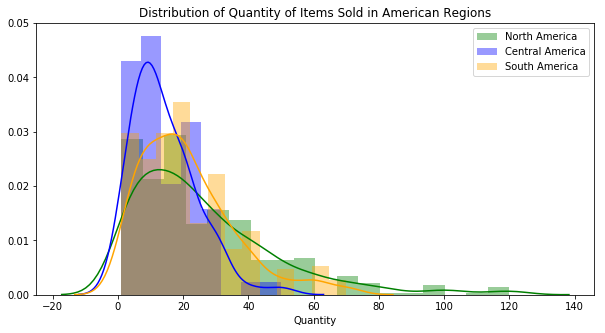

In [58]:
# Draw a plot showing overlapping of distribution
plt.figure(figsize=(10, 5))
sns.distplot(namer, color='green', label='North America')
sns.distplot(camer, color = 'blue', label='Central America')
sns.distplot(samer, color='orange', label='South America') 
plt.title('Distribution of Quantity of Items Sold in American Regions')
plt.legend()

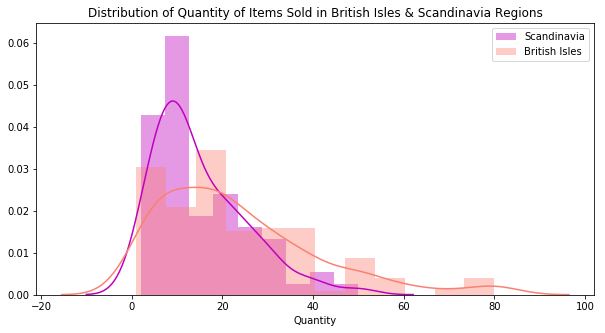

In [59]:
# Draw a plot showing overlapping of distribution 
plt.figure(figsize=(10, 5))
sns.distplot(scan, color='m', label='Scandinavia')
sns.distplot(bisles, color = 'salmon', label='British Isles')
plt.title('Distribution of Quantity of Items Sold in British Isles & Scandinavia Regions')
plt.legend()

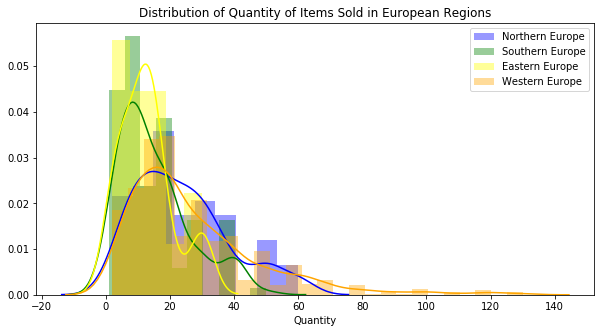

In [60]:
# Draw a plot showing overlapping of distribution
plt.figure(figsize=(10, 5))
sns.distplot(neuro, color='blue', label='Northern Europe')
sns.distplot(seuro, color = 'green', label='Southern Europe')
sns.distplot(eeuro, color='yellow', label='Eastern Europe') 
sns.distplot(weuro, color='orange', label='Western Europe') 

plt.title('Distribution of Quantity of Items Sold in European Regions')
plt.legend()

In [61]:
#  Testing for normal distribution

test1 = stats.normaltest(namer)
print ('Normality Test: North America \n', test1)
test2 =stats.normaltest(camer)
print ('\nNormality Test: Central America\n', test2)
test3 =stats.normaltest(samer)
print ('\nNormality Test: South America\n', test3)
test4 = stats.normaltest(bisles)
print ('\nNormality Test:  British Isles\n', test4)
test5 =stats.normaltest(scan)
print ('\nNormality Test: Scandinavia\n', test5)
test6 =stats.normaltest(neuro)
print ('\nNormality Test: Northern Europe\n', test6)
test7 =stats.normaltest(seuro)
print ('\nNormality Test: Southern Europe\n', test7)
test8 =stats.normaltest(eeuro)
print ('\nNormality Test: Eastern Europe\n', test8)
test9 =stats.normaltest(weuro)
print ('\nNormality Test: Western Europe\n', test9)

Normality Test: North America 
 NormaltestResult(statistic=135.53912142403163, pvalue=3.6987394699447525e-30)

Normality Test: Central America
 NormaltestResult(statistic=17.20602030206035, pvalue=0.00018355244067897196)

Normality Test: South America
 NormaltestResult(statistic=64.93826252000602, pvalue=7.92201137368654e-15)

Normality Test:  British Isles
 NormaltestResult(statistic=41.20964825972505, pvalue=1.1257412494490562e-09)

Normality Test: Scandinavia
 NormaltestResult(statistic=16.2575615239265, pvalue=0.00029492756859355945)

Normality Test: Northern Europe
 NormaltestResult(statistic=12.515701339906958, pvalue=0.0019153581124284672)

Normality Test: Southern Europe
 NormaltestResult(statistic=21.06008924451824, pvalue=2.6721431883985708e-05)

Normality Test: Eastern Europe
 NormaltestResult(statistic=2.85771466977834, pvalue=0.2395825284902985)

Normality Test: Western Europe
 NormaltestResult(statistic=271.79168244531013, pvalue=9.576042026589811e-60)


#### Eastern Europe is the only one with a p-value > .05 indicating a normal distribution

### Generate a sample from each category

In [62]:
#  sampling with replacement
na_sample = get_sample(namer, 30)
print ('North America Sample:', na_sample[:5])

ca_sample = get_sample(camer, 30)
print ('Central America Sample:', ca_sample[:5])

sa_sample = get_sample(samer, 30)
print ('South America Sample:', sa_sample[:5])

bi_sample = get_sample(bisles, 30)
print ('British Isles Sample:', bi_sample[:5])
       
s_sample = get_sample(scan, 30)
print ('Scandinavian Sample:', s_sample[:5])
      
ne_sample = get_sample(neuro, 30)
print ('Northern Europe Sample:', ne_sample[:5])
     
se_sample = get_sample(seuro, 30)
print ('Southern Europe Sample:', se_sample[:5])

ee_sample = get_sample(eeuro, 30)
print ('Eastern Europe Sample:', ee_sample[:5])

we_sample = get_sample(weuro, 30)
print ('Western Europe Sample:', we_sample[:5])  

North America Sample: [30, 10, 2, 80, 9]
Central America Sample: [5, 10, 6, 9, 50]
South America Sample: [15, 60, 10, 8, 42]
British Isles Sample: [15, 40, 12, 3, 60]
Scandinavian Sample: [35, 18, 10, 12, 20]
Northern Europe Sample: [30, 35, 40, 30, 20]
Southern Europe Sample: [12, 6, 18, 10, 24]
Eastern Europe Sample: [30, 3, 15, 30, 20]
Western Europe Sample: [15, 14, 15, 25, 40]


### Generate the mean of each sample

In [63]:
#  generate sample means

na_mean = get_sample_mean(na_sample)
print('North America Sample Mean:', round(na_mean,3))
ca_mean = get_sample_mean(ca_sample)
print('Central America Sample Mean:', round(ca_mean,3))
sa_mean = get_sample_mean(sa_sample)
print('South America Sample Mean:', round(sa_mean,3))
bi_mean = get_sample_mean(bi_sample)
print('British Isles Sample Mean:', round(bi_mean,3))
s_mean = get_sample_mean(s_sample)
print('Scandinavtian Sample Mean:', round(s_mean,3))
ne_mean = get_sample_mean(ne_sample)
print('Northern Europe Sample Mean:', round(ne_mean,3))
se_mean = get_sample_mean(se_sample)
print('Southern Europe Sample Mean:', round(se_mean,3))
ee_mean = get_sample_mean(ee_sample)
print('Eastern Europe Sample Mean:', round(ee_mean,3))
we_mean = get_sample_mean(we_sample)
print('Western Europe Sample Mean:', round(we_mean,3))


North America Sample Mean: 25.033
Central America Sample Mean: 14.6
South America Sample Mean: 19.067
British Isles Sample Mean: 26.833
Scandinavtian Sample Mean: 12.4
Northern Europe Sample Mean: 28.033
Southern Europe Sample Mean: 13.067
Eastern Europe Sample Mean: 13.233
Western Europe Sample Mean: 26.9


### Generate a distribution of sample means

In [64]:
#  sample distribution of sample means
na_sample_dist = create_sample_distribution(na_sample)
print('\nDistribution of North America Sample Means:\n', na_sample_dist[:5])
ca_sample_dist = create_sample_distribution(ca_sample)
print('\nDistribution of Central America Sample Means:\n', ca_sample_dist[:5])
sa_sample_dist = create_sample_distribution(sa_sample)
print('\nDistribution of South America Sample Means:\n', sa_sample_dist[:5])
bi_sample_dist = create_sample_distribution(bi_sample)
print('\nDistribution of British Isles Sample Means:\n', bi_sample_dist[:5])
s_sample_dist = create_sample_distribution(s_sample)
print('\nDistribution of Scandinavian Sample Means:\n', s_sample_dist[:5])
ne_sample_dist = create_sample_distribution(ne_sample)
print('\nDistribution of Northern Europe Sample Means:\n', ne_sample_dist[:5])
se_sample_dist = create_sample_distribution(se_sample)
print('\nDistribution of Southern Europe Sample Means:\n', se_sample_dist[:5])
ee_sample_dist = create_sample_distribution(ee_sample)
print('\nDistribution of Eastern Europe Sample Means:\n', ee_sample_dist[:5])
we_sample_dist = create_sample_distribution(we_sample)
print('\nDistribution of Western Europe Sample Means:\n', we_sample_dist[:5])



Distribution of North America Sample Means:
 [24.4, 23.933333333333334, 13.1, 26.2, 20.633333333333333]

Distribution of Central America Sample Means:
 [14.466666666666667, 14.033333333333333, 12.933333333333334, 13.833333333333334, 15.033333333333333]

Distribution of South America Sample Means:
 [18.933333333333334, 20.033333333333335, 19.866666666666667, 26.0, 24.066666666666666]

Distribution of British Isles Sample Means:
 [26.533333333333335, 22.0, 27.8, 21.4, 31.666666666666668]

Distribution of Scandinavian Sample Means:
 [11.933333333333334, 13.633333333333333, 14.4, 12.333333333333334, 13.333333333333334]

Distribution of Northern Europe Sample Means:
 [24.066666666666666, 26.0, 29.466666666666665, 23.7, 24.333333333333332]

Distribution of Southern Europe Sample Means:
 [13.533333333333333, 12.6, 14.933333333333334, 10.5, 14.666666666666666]

Distribution of Eastern Europe Sample Means:
 [10.866666666666667, 16.666666666666668, 10.933333333333334, 14.066666666666666, 14.1]


###  Vizualization of sample means distribution

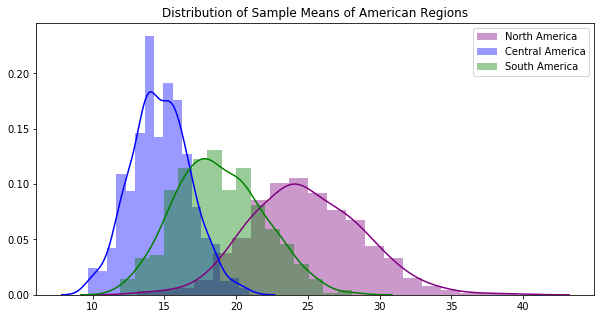

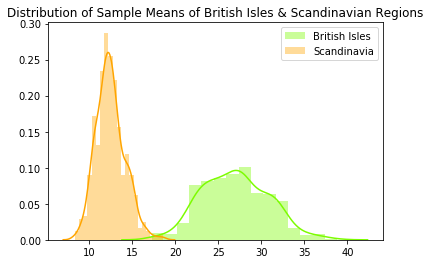

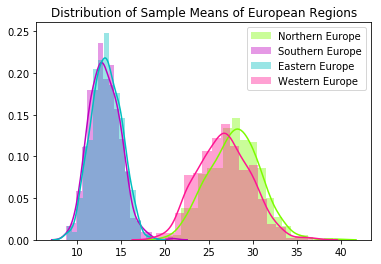

In [67]:
plt.figure(figsize=(10, 5))

sns.distplot(na_sample_dist,color = 'purple', label='North America')
sns.distplot(ca_sample_dist,color = 'blue', label='Central America')
sns.distplot(sa_sample_dist,color = 'green', label='South America')
plt.title('Distribution of Sample Means of American Regions')
plt.legend()
plt.show()

sns.distplot(bi_sample_dist,color = 'lawngreen', label='British Isles')
sns.distplot(s_sample_dist,color = 'orange', label='Scandinavia')
plt.title('Distribution of Sample Means of British Isles & Scandinavian Regions')
plt.legend()
plt.show()

sns.distplot(ne_sample_dist,color = 'lawngreen', label='Northern Europe')
sns.distplot(se_sample_dist,color = 'm', label='Southern Europe')
sns.distplot(ee_sample_dist,color = 'c', label='Eastern Europe')
sns.distplot(we_sample_dist,color = 'deeppink', label='Western Europe')
plt.title('Distribution of Sample Means of European Regions')
plt.legend()
plt.show()

## Anova Test

In [66]:
formula = 'Quantity ~ C(ShipRegion)'
lm = ols(formula, regions ).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq      df         F        PR(>F)
C(ShipRegion)   38742.747208     8.0  14.03179  4.668457e-20
Residual       740656.888987  2146.0       NaN           NaN


The Anova test results reject the null hypothesis

## Tukey Test

In [90]:
#  Group the data according to region
regions['Quantity'].groupby(regions['Code'])

# run the tukey test
mc = MultiComparison(regions['Code'], regions['Quantity'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  1      2     1.3145   -2.237   4.866  False 
  1      3     1.8747  -1.7335   5.4828 False 
  1      4     2.3529  -1.1746   5.8805 False 
  1      5     2.0992   -1.353   5.5514 False 
  1      6     2.3874  -0.9835   5.7583 False 
  1      7     2.2225  -1.8434   6.2884 False 
  1      8     2.6129   -0.956   6.1819 False 
  1      9     3.4863  -0.3728   7.3453 False 
  1      10    2.5076   -0.717   5.7323 False 
  1      11    6.3529  -3.1499  15.8558 False 
  1      12    3.0051  -0.3508   6.361  False 
  1      13    6.3529  -1.6077  14.3135 False 
  1      14    3.5752  -0.1658   7.3161 False 
  1      15    2.6606  -0.5738   5.8951 False 
  1      16    2.9815  -0.7765   6.7395 False 
  1      18    2.0976  -1.5001   5.6954 False 
  1      20    2.8887  -0.2968   6.0741 False 
  1      21    2.8729   -0.696   6.4419 False 
  1      

## Question 4:

### Which category of products are purchased the most?

#### Ho - All of the categories are purchased about the same amount
#### Ha - There is a significant difference in the amount of products purchased from one or more categories

Check tables of Category, Product, & Order Details for correct column names and data information

In [69]:
cur.execute('''select * from Category;''')
cat = pd.DataFrame(cur.fetchall())
cat.columns = [i[0] for i in cur.description]
cat.head()


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [70]:
cur.execute('''select * from Product;''')
prod = pd.DataFrame(cur.fetchall())
prod.columns = [i[0] for i in cur.description]
prod.head()


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [71]:
cur.execute('''select * from OrderDetail;''')
od = pd.DataFrame(cur.fetchall())
od.columns = [i[0] for i in cur.description]
od.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


#### Reference information for sql queries:

https://www.w3schools.com/sql/trysql.asp?filename=trysql_select_groupby1

SELECT Shippers.ShipperName,COUNT(Orders.OrderID) AS NumberOfOrders FROM Orders
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
GROUP BY ShipperName;


In [72]:
cur.execute('''SELECT Category.CategoryName,COUNT(OrderDetail.Quantity) AS QuantityOrdered
            FROM OrderDetail JOIN Product on OrderDetail.ProductId=Product.Id
            JOIN Category on Product.CategoryId=Category.Id
            Group By CategoryName''')

prod_categories = pd.DataFrame(cur.fetchall())
prod_categories.columns = [i[0] for i in cur.description]
prod_categories.head()


,CategoryName,QuantityOrdered
0,Beverages,404
1,Condiments,216
2,Confections,334
3,Dairy Products,366
4,Grains/Cereals,196


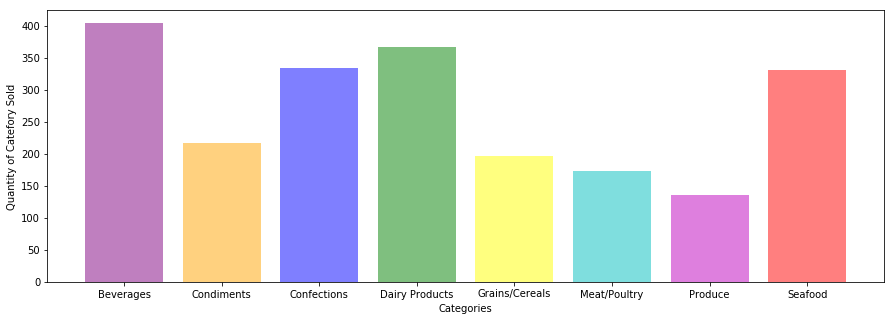

In [73]:
plt.figure(figsize=(15, 5))
X = (prod_categories['CategoryName'])
y = (prod_categories['QuantityOrdered'])
plt.bar(X,y, color=('purple','orange','blue','green','yellow','c', 'm','r'), alpha = .5)
plt.ylabel('Quantity of Catefory Sold')
plt.xlabel('Categories')
plt.show()


In [74]:
cur.execute('''Select Product.CategoryId, OrderDetail.Quantity FROM Product 
            JOIN OrderDetail on Product.Id=OrderDetail.ProductId;''')

df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head(2)


,CategoryId,Quantity
0,4,12
1,5,10


In [75]:
# Get separate data frames for each shipper
bev = df.loc[df['CategoryId'] == 1]
condim = df.loc[df['CategoryId'] == 2]
confec = df.loc[df['CategoryId'] == 3]
dairy = df.loc[df['CategoryId'] == 4]
grains = df.loc[df['CategoryId'] == 5]
meat = df.loc[df['CategoryId'] == 6]
prod = df.loc[df['CategoryId'] == 7]
sea = df.loc[df['CategoryId'] == 8]
bev.head()

,CategoryId,Quantity
15,1,42
17,1,15
20,1,20
27,1,6
29,1,50


In [76]:
# create populations of the different categories
bevs = bev['Quantity']
condiments = condim['Quantity']
confections = confec['Quantity']
dairy_prod = dairy['Quantity']
cereals = grains['Quantity']
meat_chic = meat['Quantity']
produce = prod['Quantity']
seafood = sea['Quantity']

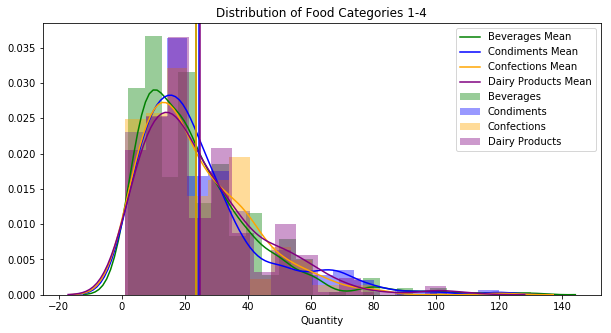

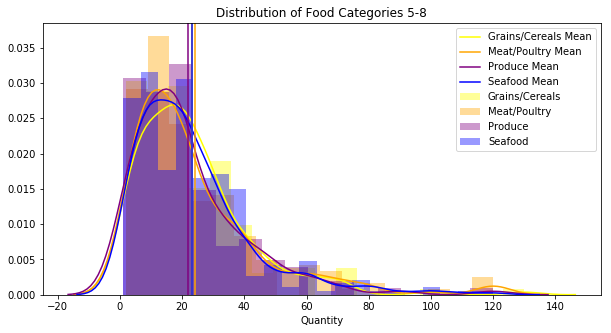

In [77]:
# Draw a plot showing overlapping of distribution  & means
plt.figure(figsize=(10, 5))
sns.distplot(bevs, color='green', label='Beverages')
sns.distplot(condiments, color = 'blue', label='Condiments')
sns.distplot(confections, color='orange', label='Confections') 
sns.distplot(dairy_prod, color='purple', label='Dairy Products')

plt.axvline(np.mean(bevs), color='green', label='Beverages Mean')
plt.axvline(np.mean(condiments), color='blue', label='Condiments Mean')
plt.axvline(np.mean(confections), color='orange', label='Confections Mean')
plt.axvline(np.mean(dairy_prod), color='purple', label='Dairy Products Mean')

plt.title('Distribution of Food Categories 1-4')
plt.legend()

plt.figure(figsize=(10, 5))
sns.distplot(cereals, color = 'yellow', label='Grains/Cereals')
sns.distplot(meat_chic, color='orange', label='Meat/Poultry') 
sns.distplot(produce, color='purple', label='Produce')
sns.distplot(seafood, color='blue', label='Seafood')

plt.axvline(np.mean(cereals), color='yellow', label='Grains/Cereals Mean')
plt.axvline(np.mean(meat_chic), color='orange', label='Meat/Poultry Mean')
plt.axvline(np.mean(produce), color='purple', label='Produce Mean')
plt.axvline(np.mean(seafood), color='blue', label='Seafood Mean')

plt.title('Distribution of Food Categories 5-8')
plt.legend()

In [78]:
#  check to see if the data is normally distributed
test1 = stats.normaltest(bevs)
print ('Normality Test:  Beverages\n', test1)
test2 =stats.normaltest(condiments)
print ('\nNormality Test: Condiments\n', test2)
test3 =stats.normaltest(confections)
print ('\nNormality Test: Confections\n', test3)
test4 = stats.normaltest(dairy_prod)
print ('\nNormality Test:  Dairy Produces\n', test4)
test5 =stats.normaltest(cereals)
print ('\nNormality Test: Grains/Cereals\n', test5)
test6 =stats.normaltest(meat_chic)
print ('\nNormality Test: Meat/Poultry\n', test6)
test7 =stats.normaltest(produce)
print ('\nNormality Test: Produce\n', test7)
test8 =stats.normaltest(seafood)
print ('\nNormality Test: Seafood\n', test8)

Normality Test:  Beverages
 NormaltestResult(statistic=181.6681223677394, pvalue=3.5585121990390937e-40)

Normality Test: Condiments
 NormaltestResult(statistic=81.45174541828092, pvalue=2.055787455866718e-18)

Normality Test: Confections
 NormaltestResult(statistic=92.13415073777898, pvalue=9.847440601265932e-21)

Normality Test:  Dairy Produces
 NormaltestResult(statistic=95.0876129905641, pvalue=2.2489882706313644e-21)

Normality Test: Grains/Cereals
 NormaltestResult(statistic=100.12792718857929, pvalue=1.8092428658070683e-22)

Normality Test: Meat/Poultry
 NormaltestResult(statistic=88.88760275909813, pvalue=4.992318745705242e-20)

Normality Test: Produce
 NormaltestResult(statistic=72.66768477588049, pvalue=1.6611648945470073e-16)

Normality Test: Seafood
 NormaltestResult(statistic=138.58403463372616, pvalue=8.069734369592581e-31)


#### The p-values are < .05 so therefore our data is not normally distributed

### Generate a sample from each category

In [79]:
#  sampling with replacement
bev_sample = get_sample(bevs, 30)
print ('Beverages Sample:', bev_sample[:5])

cond_sample = get_sample(condiments, 30)
print ('Condiments Sample:', cond_sample[:5])

conf_sample = get_sample(confections, 30)
print ('Confections Sample:', conf_sample[:5])

dairy_sample = get_sample(dairy_prod, 30)
print ('Dairy Sample:', dairy_sample[:5])

grain_sample = get_sample(cereals, 30)
print ('Grains/Cereals Sample:', grain_sample[:5])

meat_sample = get_sample(meat_chic, 30)
print ('Meat/Poultry Sample:', meat_sample[:5])

prod_sample = get_sample(produce, 30)
print ('Produce Sample:', prod_sample[:5])

sea_sample = get_sample(seafood, 30)
print ('Seafood Sample:', sea_sample[:5])


Beverages Sample: [5, 2, 30, 8, 30]
Condiments Sample: [30, 35, 20, 20, 5]
Confections Sample: [14, 55, 18, 30, 40]
Dairy Sample: [16, 30, 6, 70, 40]
Grains/Cereals Sample: [12, 6, 20, 6, 40]
Meat/Poultry Sample: [6, 20, 3, 3, 10]
Produce Sample: [15, 10, 16, 24, 15]
Seafood Sample: [40, 30, 20, 13, 20]


### Generate the mean of each sample

In [80]:
#  generate sample means
bev_mean = get_sample_mean(bev_sample)
print('Beverages Sample Mean:', round(bev_mean,3))

cond_mean = get_sample_mean(cond_sample)
print('Condiments Sample Mean:', round(cond_mean,3))

conf_mean = get_sample_mean(conf_sample)
print('Confections Sample Mean:', round(conf_mean,3))

dairy_mean = get_sample_mean(dairy_sample)
print('Dairy Products Sample Mean:', round(dairy_mean,3))

grain_mean = get_sample_mean(grain_sample)
print('Grain/Cereal Sample Mean:', round(grain_mean,3))

meat_mean = get_sample_mean(meat_sample)
print('Meat/Poultry Sample Mean:', round(meat_mean,3))

prod_mean = get_sample_mean(prod_sample)
print('Produce Sample Mean:', round(prod_mean,3))

sea_mean = get_sample_mean(sea_sample)
print('Seafood Sample Mean:', round(sea_mean,3))


Beverages Sample Mean: 19.333
Condiments Sample Mean: 23.367
Confections Sample Mean: 20.433
Dairy Products Sample Mean: 21.133
Grain/Cereal Sample Mean: 21.567
Meat/Poultry Sample Mean: 27.2
Produce Sample Mean: 25.933
Seafood Sample Mean: 28.133


### Generate a distribution of sample means

In [81]:
#  sample distribution of sample means
bev_sample_dist = create_sample_distribution(bev_sample)
print('\nDistribution of Beverages Sample Means:\n', bev_sample_dist[:5])
cond_sample_dist = create_sample_distribution(cond_sample)
print ('\nDistribution of Condiments Sample Means:\n', cond_sample_dist[:5])
conf_sample_dist = create_sample_distribution(conf_sample)
print ('\nDistribution of Confections Sample Means:\n', conf_sample_dist[:5])
dairy_sample_dist = create_sample_distribution(dairy_sample)
print('\nDistribution of Dairy Products Sample Means:\n', dairy_sample_dist[:5])

grain_sample_dist = create_sample_distribution(grain_sample)
print ('\nDistribution of Grain/Cereal Sample Means:\n', grain_sample_dist[:5])
meat_sample_dist = create_sample_distribution(meat_sample)
print ('\nDistribution of Meat/Poultry Sample Means:\n', meat_sample_dist[:5])
prod_sample_dist = create_sample_distribution(prod_sample)
print ('\nDistribution of Produce Sample Means:\n', prod_sample_dist[:5])
sea_sample_dist = create_sample_distribution(sea_sample)
print ('\nDistribution of Seafood Sample Means:\n', sea_sample_dist[:5])




Distribution of Beverages Sample Means:
 [18.666666666666668, 15.233333333333333, 16.9, 21.7, 19.433333333333334]

Distribution of Condiments Sample Means:
 [19.0, 25.833333333333332, 27.7, 26.5, 32.53333333333333]

Distribution of Confections Sample Means:
 [15.433333333333334, 20.266666666666666, 23.866666666666667, 21.666666666666668, 21.133333333333333]

Distribution of Dairy Products Sample Means:
 [19.466666666666665, 21.2, 20.333333333333332, 27.3, 21.8]

Distribution of Grain/Cereal Sample Means:
 [16.5, 23.3, 25.533333333333335, 20.9, 18.233333333333334]

Distribution of Meat/Poultry Sample Means:
 [33.36666666666667, 39.56666666666667, 32.333333333333336, 26.866666666666667, 22.2]

Distribution of Produce Sample Means:
 [34.56666666666667, 27.0, 30.3, 22.466666666666665, 26.933333333333334]

Distribution of Seafood Sample Means:
 [29.533333333333335, 25.8, 27.0, 31.133333333333333, 28.1]


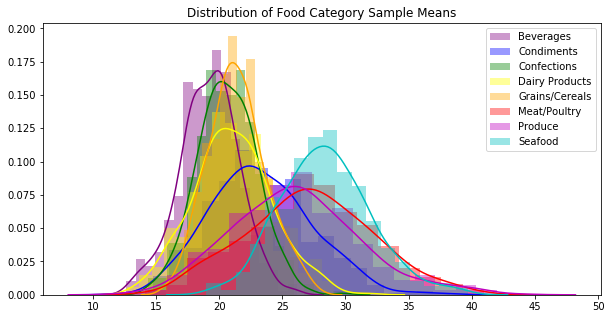

In [82]:
plt.figure(figsize=(10, 5))

sns.distplot(bev_sample_dist,color = 'purple', label='Beverages')
sns.distplot(cond_sample_dist,color = 'blue', label='Condiments')
sns.distplot(conf_sample_dist,color = 'green', label='Confections')
sns.distplot(dairy_sample_dist,color = 'yellow', label='Dairy Products')
sns.distplot(grain_sample_dist,color = 'orange', label='Grains/Cereals')
sns.distplot(meat_sample_dist,color = 'red', label='Meat/Poultry')
sns.distplot(prod_sample_dist,color = 'm', label='Produce')
sns.distplot(sea_sample_dist,color = 'c', label='Seafood')

plt.title('Distribution of Food Category Sample Means')
plt.legend()
plt.show()

## Anova Test

In [83]:
formula = 'Quantity ~ C(CategoryId)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq      df         F    PR(>F)
C(CategoryId)    1292.377084     7.0  0.509429  0.828058
Residual       778107.259110  2147.0       NaN       NaN


### 0.8281 is not < .05 and therefore we cannot reject the null hypothesis

## Tukey Test

In [84]:
#  Group the data according to the food category
df['Quantity'].groupby(df['CategoryId'])


In [85]:
# run the tukey test
mc = MultiComparison(df['CategoryId'], df['Quantity'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  1      2    -0.5396  -3.2281   2.1489 False 
  1      3    -0.5371  -3.2684   2.1943 False 
  1      4    -0.8406   -3.511   1.8297 False 
  1      5    -1.2081  -3.8214   1.4052 False 
  1      6    -0.8634  -3.4152   1.6884 False 
  1      7    -1.4066  -4.4845   1.6712 False 
  1      8    -0.6388  -3.3405   2.0629 False 
  1      9    -0.4588  -3.3801   2.4625 False 
  1      10   -1.1417  -3.5828   1.2994 False 
  1      11   -1.0588  -8.2524   6.1348 False 
  1      12    -1.124  -3.6645   1.4164 False 
  1      13    2.6078  -3.4183   8.634  False 
  1      14   -0.8922   -3.724   1.9397 False 
  1      15   -1.0174  -3.4659   1.4311 False 
  1      16   -0.4303  -3.2751   2.4146 False 
  1      18   -0.2503  -2.9738   2.4732 False 
  1      20   -0.8406  -3.2519   1.5708 False 
  1      21   -1.3188  -4.0205   1.3829 False 
  1      

#### The Tukey test did not identify any particular category that could reject the null hypothesis

## Conclusion¶
### Question 1:
There is statistical evidence that certain discounts affect the quantity of products that are ordered.  The discounts that do not affect sales can be eliminated.


### Question 2:
The null hypothesis could not be rejected, therefore there is no significant difference betweeen the rates of the 3 different shippers.  Visually, it seems that Speedy Express is the best deal.

### Question 3:
The Anova test rejected the null hypothesis stating that the quantity of products sold to each of the regions was not significantly different.  

### Question 4:
Even though some of the visual graphing of the data seems to suggest a significant difference in the quantity of products purchased from the different categories, the statistical testing failed to reject the null hypothesis.

## Future Exploration

#### Discounts:
Are there certain products purchased that are not influenced by any discount incentive?  These items may be considered 'essential' by the consumer and discounts should not be used on these particular items.

#### Shippers:
Even though there was no statistical significance between the shippers used, if there is one shipper that services all of the different regions, a loyalty discount may be requested by Northwind from one sole shipping provider in order to save on shipping expenses.

#### Regions:
Should regions where sales are significantly lower be eliminated and other markets explored? Or is the demand potentially there but more or different marketing strategies need to be used to generate more sales?
